In [ ]:
#Activate GPU in colab
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

Librosa is used to access audio data, play, display data in waveform,etc

In [2]:
#import all required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd #Allows Audio files to be played directly in the notebook
import glob
import random
sns.set_style("whitegrid")

Connect Google Drive for accessing audio data files

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/Shareddrives/DATA255/Tess"

In [5]:
#changing the working directory
%cd /content/gdrive/Shareddrives/DATA255/Tess/

/content/gdrive/Shareddrives/DATA255/Tess


In [6]:
print(os.getcwd())

/content/gdrive/Shareddrives/DATA255/Tess


Get paths of all TESS audio files into a list

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/gdrive/Shareddrives/DATA255/Tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
len(paths)

2800

In [9]:
paths[:5] #Contains path of all audios

['/content/gdrive/Shareddrives/DATA255/Tess/OAF_Fear/OAF_beg_fear.wav',
 '/content/gdrive/Shareddrives/DATA255/Tess/OAF_Fear/OAF_bean_fear.wav',
 '/content/gdrive/Shareddrives/DATA255/Tess/OAF_Fear/OAF_bought_fear.wav',
 '/content/gdrive/Shareddrives/DATA255/Tess/OAF_Fear/OAF_bar_fear.wav',
 '/content/gdrive/Shareddrives/DATA255/Tess/OAF_Fear/OAF_bite_fear.wav']

In [10]:
labels[-10:-1]

['disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust']

In [11]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
1,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
2,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
3,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
4,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear


In [12]:
df['label'].value_counts()

fear       400
sad        400
angry      400
disgust    400
ps         400
happy      400
neutral    400
Name: label, dtype: int64

Change the directory to get RAVDNESS audio files

In [13]:
%cd /content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24/

/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24


In [14]:
print(os.getcwd())

/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24


In [15]:
audios = glob.glob(os.path.join("Actor_*/*.wav"), recursive=True)

print(f"Total Audio Files : {len(audios)}")

Total Audio Files : 1440


In [16]:
audios[:5] #Contains path of all audios

['Actor_06/03-01-01-01-01-01-06.wav',
 'Actor_06/03-01-01-01-01-02-06.wav',
 'Actor_06/03-01-01-01-02-02-06.wav',
 'Actor_06/03-01-06-02-02-01-06.wav',
 'Actor_06/03-01-01-01-02-01-06.wav']

In [17]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [18]:
emotion=[emotions[i.split("-")[2]] for i in audios] 

In [19]:
data_tuples = list(zip(audios,emotion))
data_tuples[:5]

[('Actor_06/03-01-01-01-01-01-06.wav', 'neutral'),
 ('Actor_06/03-01-01-01-01-02-06.wav', 'neutral'),
 ('Actor_06/03-01-01-01-02-02-06.wav', 'neutral'),
 ('Actor_06/03-01-06-02-02-01-06.wav', 'fearful'),
 ('Actor_06/03-01-01-01-02-01-06.wav', 'neutral')]

In [20]:
metadata = pd.DataFrame(data_tuples, columns=['speech','label'])

In [21]:
metadata.head()

,speech,label
0,Actor_06/03-01-01-01-01-01-06.wav,neutral
1,Actor_06/03-01-01-01-01-02-06.wav,neutral
2,Actor_06/03-01-01-01-02-02-06.wav,neutral
3,Actor_06/03-01-06-02-02-01-06.wav,fearful
4,Actor_06/03-01-01-01-02-01-06.wav,neutral


In [22]:
df.head()

,speech,label
0,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
1,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
2,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
3,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear
4,/content/gdrive/Shareddrives/DATA255/Tess/OAF_...,fear


Combine both datasets

In [23]:
frames = [df, metadata]

result = pd.concat(frames,ignore_index=True)

In [24]:
result.tail()

,speech,label
4235,Actor_20/03-01-08-02-01-01-20.wav,surprised
4236,Actor_20/03-01-08-02-02-02-20.wav,surprised
4237,Actor_20/03-01-08-02-01-02-20.wav,surprised
4238,Actor_20/03-01-08-01-02-01-20.wav,surprised
4239,Actor_20/03-01-08-01-02-02-20.wav,surprised


[Text(0.5, 1.0, 'Raw Data')]

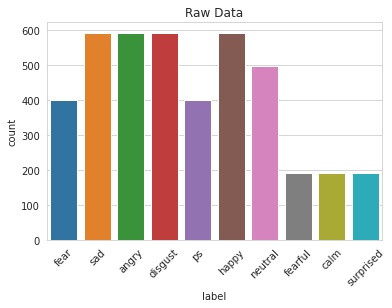

In [27]:
ax = sns.countplot(result['label'])
ax.tick_params(axis='x', rotation=45)
ax.set(title='Raw Data')

Both datasets has same labels but with different names. So combining similar labels

In [28]:
result['label']=result['label'].replace("ps","surprised")

In [29]:
result['label']=result['label'].replace("neutral","calm")

In [30]:
result['label']=result['label'].replace("fearful","fear")

[Text(0.5, 1.0, 'Combined Data')]

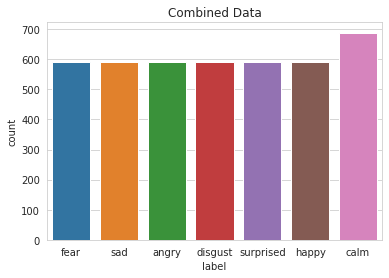

In [32]:
sns.countplot(result['label']).set(title='Combined Data')

In [33]:
print(result['label'].unique())


['fear' 'sad' 'angry' 'disgust' 'surprised' 'happy' 'calm']


In [34]:
df=result

  Display all the emotion's waveplot and spectrogram

In [35]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format="%+2.f dB")

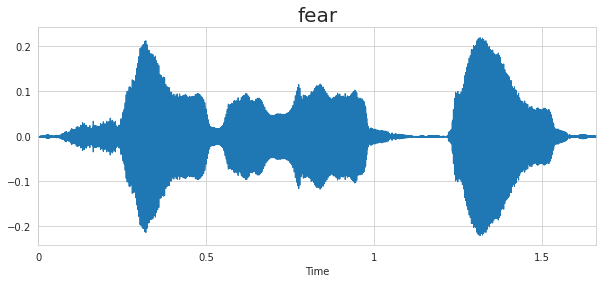

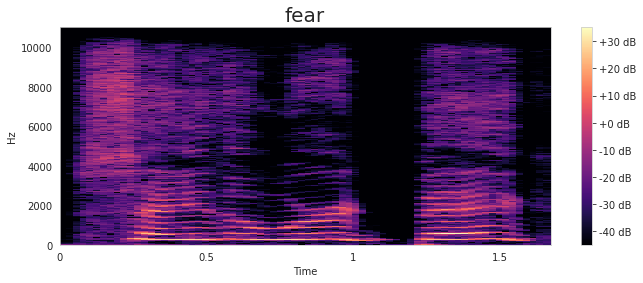

In [36]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

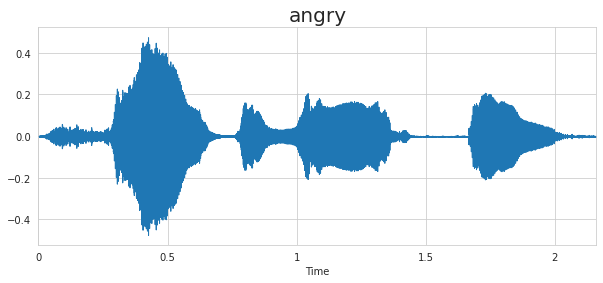

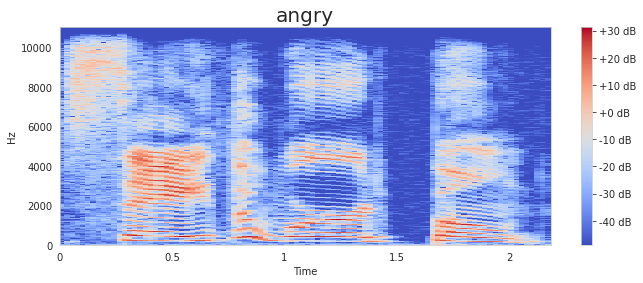

In [37]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

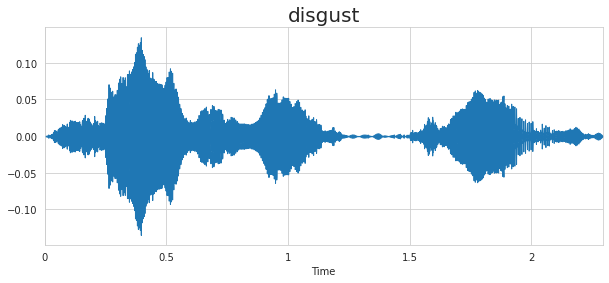

22050


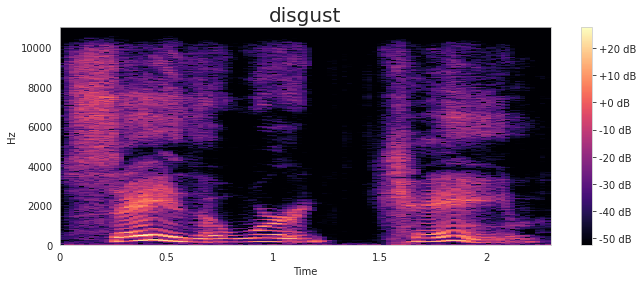

In [38]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
print(sampling_rate)

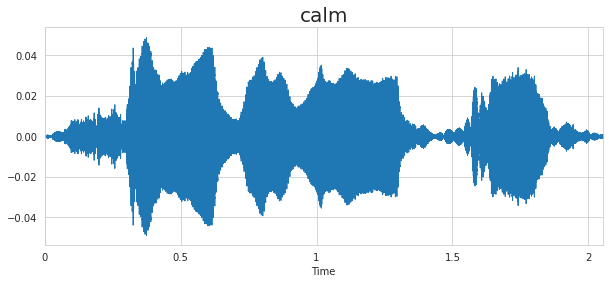

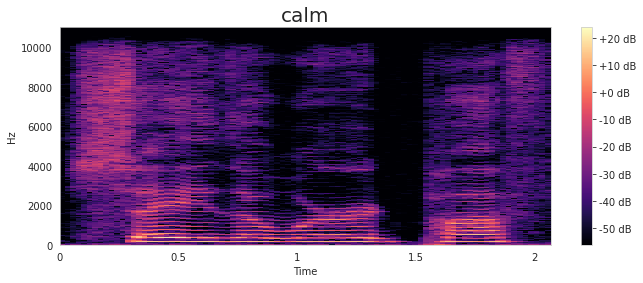

In [39]:
emotion = 'calm'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

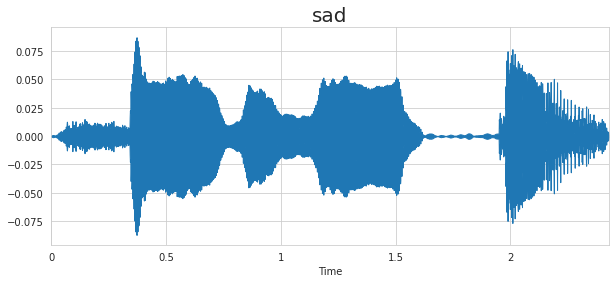

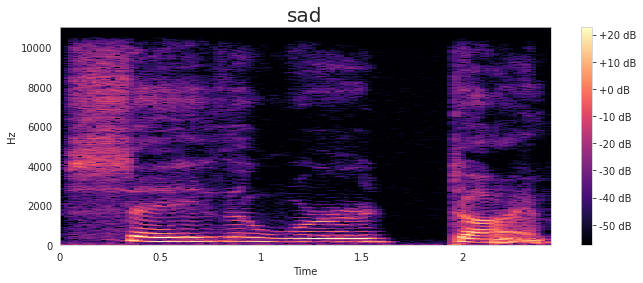

In [40]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

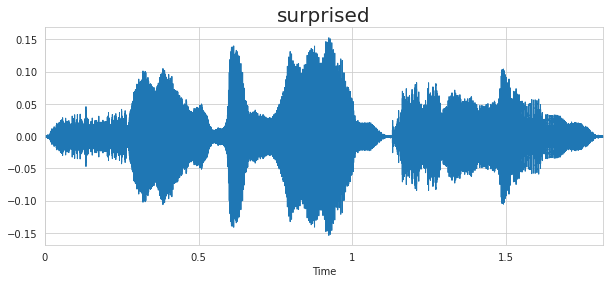

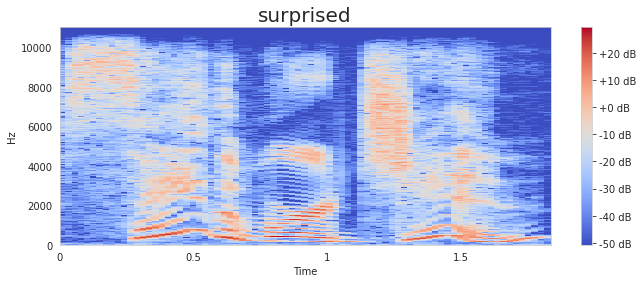

In [41]:
emotion = 'surprised'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

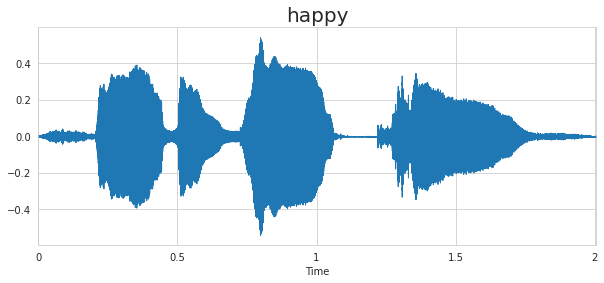

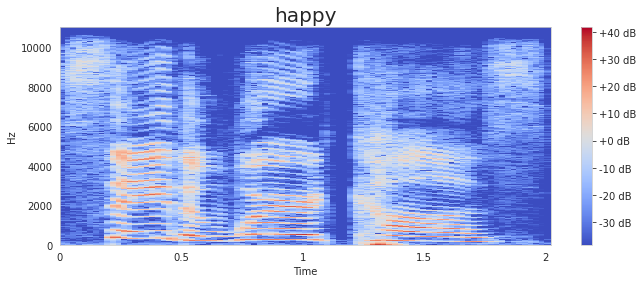

In [42]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

The combined dataset is not large enough and causing underfitting, so Data Augumentation is performed using Noise and Pitch of nlpaug library

In [45]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 15.3 MB/s 


In [46]:
import nlpaug
nlpaug.__version__

'1.1.11'

In [47]:
import nlpaug.augmenter.audio as naa

from nlpaug.util.audio.visualizer import AudioVisualizer

Feature extraction of audio data is done using MFCC with total number of features as 40

In [48]:
def extract_mfcc(filename):
        
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [49]:
def noise(filename):
    aug = naa.NoiseAug()
    
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    
    augmented_data = aug.augment(y)
    
    mfcc = np.mean(librosa.feature.mfcc(y=augmented_data, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [50]:
def pitch(filename):
     
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    
    aug = naa.PitchAug(sampling_rate=sr, factor=(2,3))
    augmented_data = aug.augment(y)
    mfcc = np.mean(librosa.feature.mfcc(y=augmented_data, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [51]:
!pip3 install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 15.6 MB/s 
     |████████████████████████████████| 280 kB 13.0 MB/s 
     |████████████████████████████████| 1.6 MB 50.3 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=f37dc2a3227f6f916b48077e7a9aaa341b71f6094700f0c8d830fed268dbbb3d
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [52]:
import swifter

In [53]:
X_mfcc = df['speech'].swifter.apply(lambda x: extract_mfcc(x))

Pandas Apply:   0%|          | 0/4240 [00:00<?, ?it/s]

In [57]:
X_mfcc

0       [-437.31268, 74.31987, 7.144662, -7.9792037, 9...
1       [-500.8915, 75.02085, 22.721863, 10.871353, 9....
2       [-475.63986, 103.96901, 15.563694, -21.170563,...
3       [-456.86343, 97.63094, 16.04151, -31.753325, -...
4       [-470.10178, 90.04231, 12.782275, -14.783961, ...
                              ...                        
4235    [-444.88257, 44.634167, -31.405737, 4.274031, ...
4236    [-562.17584, 40.83896, -22.902687, 7.2095313, ...
4237    [-627.7489, 48.716534, -21.70883, 3.8962123, -...
4238    [-662.7162, 43.340572, -14.290281, 5.088252, -...
4239    [-652.525, 46.448944, -19.900116, 7.365791, -1...
Name: speech, Length: 4240, dtype: object

In [58]:
X_mfcc.shape

(4240,)

In [59]:
X_noise = df['speech'].swifter.apply(lambda x: noise(x))

ParameterError: ignored

In [56]:
X_noise

NameError: ignored

In [ ]:
X_noise.shape

In [60]:
X_pitch= df['speech'].swifter.apply(lambda x: pitch(x))

ParameterError: ignored

In [ ]:
X_pitch

All the data augumentation results are combined into a single dataset of 12720 size

In [ ]:
X_con1=pd.concat([X_mfcc, X_noise, X_pitch], ignore_index=True)

In [ ]:
print(X_con1.shape)
X = [x for x in X_con1]

X = np.array(X)

X.shape


In [ ]:
## input split
X = np.expand_dims(X,-1)
X.shape

Labels are categorical, so OneHotEncoding is used to convert them and pass to the model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y1=np.concatenate((y, y,y), axis=0)

In [ ]:
y1.shape

Split the dataset into train and test in the ratio of 75:25

In [ ]:
#DataFlair - Split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(np.array(X), y1, test_size=0.25, random_state=9)

LSTM model is developed using BatchNormalization, Dropout and Dense layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization,Flatten
from sklearn.metrics import accuracy_score
import tensorflow as tf 


model = Sequential([
    LSTM(512, return_sequences=False, input_shape=(40,1)),
    
     BatchNormalization(),  
     Dropout(0.2),
 
    Dense(64, activation='relu'),
    
    Dropout(0.1),
    
    
    

    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50 , batch_size=128)

Accuracy vs Epochs graph

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy') 
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Loss vs Epochs graph

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Calculating Accuracy for the test dataset

In [ ]:
# Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
# Calculate the accuracy of our model

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=np.argmax(y_pred, axis=1))

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy of 85% is returned for test dataset for LSTM model

Save the model for future use

In [ ]:
model.save("/content/gdrive/Shareddrives/DATA255/model_comb_noise_pitch_adam.h5")